In [89]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d, interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp

from sklearn.datasets import load_iris


import pandas as pd

import time



print(tf.__version__)

2.8.0


In [2]:
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
len(iris.data)

150

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data)

In [9]:
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df.columns = iris.feature_names

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
print(iris.data.shape)

(150, 4)


In [14]:
# store feature matrix in "x"
X = iris.data

In [15]:
# store feature vector in "y"
y = iris.target

# scikit-learn 4-step modeling pattern

## K-Nearest Neighbor

In [16]:
# Step 1: Import the class you plan to use
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Step 2: "Instantiate" the estimator
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [19]:
import sklearn; sklearn.show_versions()


System:
    python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
executable: D:\anaconda3\envs\tf_gpu\python.exe
   machine: Windows-10-10.0.19044-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 61.2.0
      sklearn: 1.0.2
        numpy: 1.21.5
        scipy: 1.7.3
       Cython: None
       pandas: 1.4.2
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


D:\anaconda3\envs\tf_gpu\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [20]:
# Need [[Double Brackets]] for sckit version
knn.predict([[3, 5, 4, 2]])

array([2])

In [21]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]


In [22]:
knn.predict(X_new)

array([2, 1])

In [23]:
# instantiate the model (using value k=5)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

knn.predict(X_new)

array([1, 1])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# instantiate the model (using default parameters, CHANGE solver='liblinear')
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

array([2, 0])

# Interpolation

In [26]:
x_data = np.linspace(0, 5, 5)
y_data = x_data**2

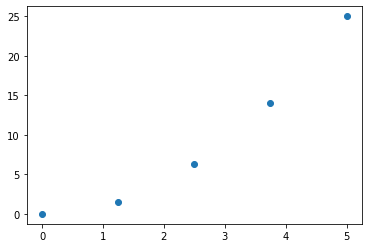

In [27]:
plt.scatter(x_data, y_data)

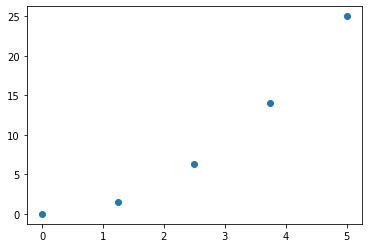

In [28]:
fig1 = plt.figure(facecolor='white')
ax = fig1.add_subplot(111)

scp = plt.scatter(x_data, y_data)

plt.show()

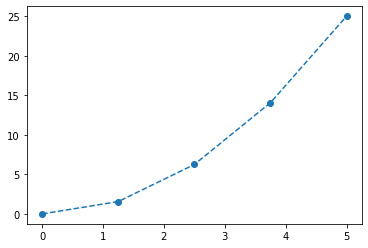

In [29]:
fig2 = plt.figure(facecolor='white')
ax = fig2.add_subplot(111)

scp = plt.plot(x_data, y_data, 'o--')

plt.show()

In [30]:
y_f = interp1d(x_data, y_data, 'linear')

x = np.linspace(0, 5, 100)
y = y_f(x)

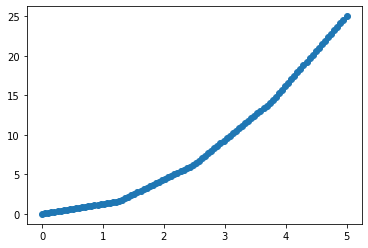

In [31]:
fig3 = plt.figure(facecolor='white')
ax = fig3.add_subplot(111)

scp = plt.scatter(x, y)

plt.show()

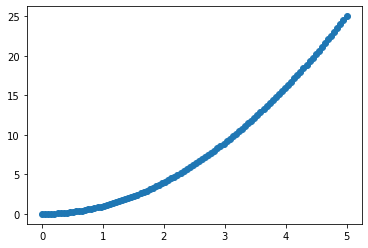

In [32]:
y_f = interp1d(x_data, y_data, 'cubic')

x = np.linspace(0, 5, 100)
y = y_f(x)

fig4 = plt.figure(facecolor='white')
ax = fig4.add_subplot(111)

scp = plt.scatter(x, y)

plt.show()

## Example
#### https://www.youtube.com/watch?v=nGwg5MrbZxo
#### https://github.com/lukepolson/youtube_channel/blob/main/Python%20Tutorial%20Series/interpolation1.ipynb

In [33]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
x_s_data = df['sepal width (cm)']
y_s_data = df['sepal length (cm)']

x_p_data = df['petal width (cm)']
y_p_data = df['petal length (cm)']

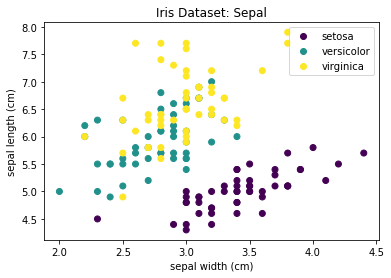

In [35]:
fig4 = plt.figure(facecolor='white')
ax = fig4.add_subplot(111)

plt.title("Iris Dataset: Sepal")
plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp = plt.scatter(x_s_data, y_s_data, c=iris.target)

classes = iris.target_names

plt.legend(handles=scp.legend_elements()[0], labels=[i for i in iris.target_names])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


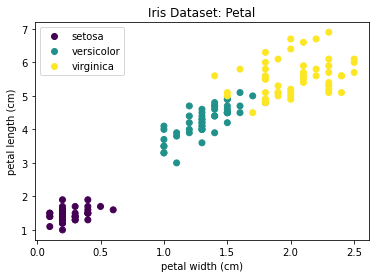

In [36]:
fig5 = plt.figure(facecolor='white')
ax = fig5.add_subplot(111)

ax.legend()

scp = plt.scatter(x_p_data, y_p_data, c=iris.target)

plt.title("Iris Dataset: Petal")
plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

classes = iris.target_names

plt.legend(handles=scp.legend_elements()[0], labels=[i for i in iris.target_names])

In [37]:
# iris = load_iris()

# df = pd.DataFrame(iris.data)

# df.columns = iris.feature_names

In [38]:
iris = load_iris()

df = pd.DataFrame(iris.data)

df.columns = iris.feature_names

In [39]:
# store feature matrix in "x"
X = iris.data

In [40]:
# store feature vector in "y"
y = iris.target

In [41]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, Y, test_size=0.2, random_state=1, stratify = y)

# Take out a test set
# train, test = train_test_split(df, test_size = 0.2, stratify = y, random_state = 42)

# Logistic regression
# logreg = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
# prediction=logreg.predict(X_test)
# print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

In [43]:
# Use One-Hot-Encoding, Needed for Neural Network
Y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [44]:
# from sklearn.preprocessing import MinMaxScaler
# scaler_object = MinMaxScaler()
# scaler_object.fit(X_train)

# scaled_X_train = scaler_object.transform(X_train)
# scaled_X_test = scaler_object.transform(X_test)

In [45]:
acc_array_0 = []

acc = 100

while acc > .30: 

    model_0 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
      ])

    model_0.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    model_0.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0)

    loss, accuracy = model_0.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    
    acc = accuracy

# predict_x = model_0.predict(scaled_X_test)
# y_pred = np.argmax(predict_x,axis=1)
# print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(y_test.argmax(axis=1),y_pred)))

# acc_array_0.append(metrics.accuracy_score(y_test.argmax(axis=1),y_pred)) 
# predict_x = model_2.predict(scaled_X_test)
# y_pred = np.argmax(predict_x,axis=1)

Test loss: 0.9125359654426575
Test accuracy: 0.5666666626930237
Test loss: 0.5964118838310242
Test accuracy: 0.8333333134651184
Test loss: 0.5675114989280701
Test accuracy: 0.6000000238418579
Test loss: 1.1174800395965576
Test accuracy: 0.20000000298023224


In [46]:
y_pred = model_0.predict(X_test)
y_pred

array([[0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.32504836, 0.31440282, 0.3605488 ],
       [0.

In [47]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Predicted: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [48]:
# targets = []
# X_new = []

# for index, row in df_iris_E_13.iterrows():
#     X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
#          row['petal length (cm)'], row['petal width (cm)']])
    
# targets = logreg.predict(X_new)

In [49]:
# prediction

In [50]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
df_iris = df.copy()
df_iris['Target'] = iris.target

In [52]:
df_iris_new_A = df_iris.groupby(['Target']).sample(1)
df_iris_new_B = df_iris.groupby(['Target']).sample(1)
df_iris_new_C = df_iris.groupby(['Target']).sample(1)
df_iris_new_D = df_iris.groupby(['Target']).sample(1)
df_iris_new_E = df_iris.groupby(['Target']).sample(1)

In [53]:
df_iris_new_A

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
19,5.1,3.8,1.5,0.3,0
95,5.7,3.0,4.2,1.2,1
102,7.1,3.0,5.9,2.1,2


In [54]:
sl1 = df_iris_new_A['sepal length (cm)'].iloc[0]
sl2 = df_iris_new_A['sepal length (cm)'].iloc[1]
sl3 = df_iris_new_A['sepal length (cm)'].iloc[2]

sw1 = df_iris_new_A['sepal width (cm)'].iloc[0]
sw2 = df_iris_new_A['sepal width (cm)'].iloc[1]
sw3 = df_iris_new_A['sepal width (cm)'].iloc[2]

pl1 = df_iris_new_A['petal length (cm)'].iloc[0]
pl2 = df_iris_new_A['petal length (cm)'].iloc[1]
pl3 = df_iris_new_A['petal length (cm)'].iloc[2]

pw1 = df_iris_new_A['petal width (cm)'].iloc[0]
pw2 = df_iris_new_A['petal width (cm)'].iloc[1]
pw3 = df_iris_new_A['petal width (cm)'].iloc[2]

In [55]:
sl12 = np.linspace(sl1, sl2, 10)
sl13 = np.linspace(sl1, sl3, 10)
sl23 = np.linspace(sl2, sl3, 10)

sw12 = np.linspace(sw1, sw2, 10)
sw13 = np.linspace(sw1, sw3, 10)
sw23 = np.linspace(sw2, sw3, 10)

pl12 = np.linspace(pl1, pl2, 10)
pl13 = np.linspace(pl1, pl3, 10)
pl23 = np.linspace(pl2, pl3, 10)

pw12 = np.linspace(pw1, pw2, 10)
pw13 = np.linspace(pw1, pw3, 10)
pw23 = np.linspace(pw2, pw3, 10)

In [56]:
df_iris_A_12 = pd.DataFrame(list(zip(sl12, sw12, pl12, pw12)), columns = iris.feature_names)
df_iris_A_13 = pd.DataFrame(list(zip(sl13, sw13, pl13, pw13)), columns = iris.feature_names)
df_iris_A_23 = pd.DataFrame(list(zip(sl23, sw23, pl23, pw23)), columns = iris.feature_names)

In [57]:
df_iris_A_12

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100000,3.800000,1.5,0.3
1,5.166667,3.711111,1.8,0.4
2,5.233333,3.622222,2.1,0.5
3,5.300000,3.533333,2.4,0.6
4,5.366667,3.444444,2.7,0.7
5,5.433333,3.355556,3.0,0.8
6,5.500000,3.266667,3.3,0.9
7,5.566667,3.177778,3.6,1.0
8,5.633333,3.088889,3.9,1.1
9,5.700000,3.000000,4.2,1.2


In [58]:
sl1 = df_iris_new_B['sepal length (cm)'].iloc[0]
sl2 = df_iris_new_B['sepal length (cm)'].iloc[1]
sl3 = df_iris_new_B['sepal length (cm)'].iloc[2]

sw1 = df_iris_new_B['sepal width (cm)'].iloc[0]
sw2 = df_iris_new_B['sepal width (cm)'].iloc[1]
sw3 = df_iris_new_B['sepal width (cm)'].iloc[2]

pl1 = df_iris_new_B['petal length (cm)'].iloc[0]
pl2 = df_iris_new_B['petal length (cm)'].iloc[1]
pl3 = df_iris_new_B['petal length (cm)'].iloc[2]

pw1 = df_iris_new_B['petal width (cm)'].iloc[0]
pw2 = df_iris_new_B['petal width (cm)'].iloc[1]
pw3 = df_iris_new_B['petal width (cm)'].iloc[2]

sl12 = np.linspace(sl1, sl2, 10)
sl13 = np.linspace(sl1, sl3, 10)
sl23 = np.linspace(sl2, sl3, 10)

sw12 = np.linspace(sw1, sw2, 10)
sw13 = np.linspace(sw1, sw3, 10)
sw23 = np.linspace(sw2, sw3, 10)

pl12 = np.linspace(pl1, pl2, 10)
pl13 = np.linspace(pl1, pl3, 10)
pl23 = np.linspace(pl2, pl3, 10)

pw12 = np.linspace(pw1, pw2, 10)
pw13 = np.linspace(pw1, pw3, 10)
pw23 = np.linspace(pw2, pw3, 10)

df_iris_B_12 = pd.DataFrame(list(zip(sl12, sw12, pl12, pw12)), columns = iris.feature_names)
df_iris_B_13 = pd.DataFrame(list(zip(sl13, sw13, pl13, pw13)), columns = iris.feature_names)
df_iris_B_23 = pd.DataFrame(list(zip(sl23, sw23, pl23, pw23)), columns = iris.feature_names)

In [59]:
sl1 = df_iris_new_C['sepal length (cm)'].iloc[0]
sl2 = df_iris_new_C['sepal length (cm)'].iloc[1]
sl3 = df_iris_new_C['sepal length (cm)'].iloc[2]

sw1 = df_iris_new_C['sepal width (cm)'].iloc[0]
sw2 = df_iris_new_C['sepal width (cm)'].iloc[1]
sw3 = df_iris_new_C['sepal width (cm)'].iloc[2]

pl1 = df_iris_new_C['petal length (cm)'].iloc[0]
pl2 = df_iris_new_C['petal length (cm)'].iloc[1]
pl3 = df_iris_new_C['petal length (cm)'].iloc[2]

pw1 = df_iris_new_C['petal width (cm)'].iloc[0]
pw2 = df_iris_new_C['petal width (cm)'].iloc[1]
pw3 = df_iris_new_C['petal width (cm)'].iloc[2]

sl12 = np.linspace(sl1, sl2, 10)
sl13 = np.linspace(sl1, sl3, 10)
sl23 = np.linspace(sl2, sl3, 10)

sw12 = np.linspace(sw1, sw2, 10)
sw13 = np.linspace(sw1, sw3, 10)
sw23 = np.linspace(sw2, sw3, 10)

pl12 = np.linspace(pl1, pl2, 10)
pl13 = np.linspace(pl1, pl3, 10)
pl23 = np.linspace(pl2, pl3, 10)

pw12 = np.linspace(pw1, pw2, 10)
pw13 = np.linspace(pw1, pw3, 10)
pw23 = np.linspace(pw2, pw3, 10)

df_iris_C_12 = pd.DataFrame(list(zip(sl12, sw12, pl12, pw12)), columns = iris.feature_names)
df_iris_C_13 = pd.DataFrame(list(zip(sl13, sw13, pl13, pw13)), columns = iris.feature_names)
df_iris_C_23 = pd.DataFrame(list(zip(sl23, sw23, pl23, pw23)), columns = iris.feature_names)

In [60]:
sl1 = df_iris_new_D['sepal length (cm)'].iloc[0]
sl2 = df_iris_new_D['sepal length (cm)'].iloc[1]
sl3 = df_iris_new_D['sepal length (cm)'].iloc[2]

sw1 = df_iris_new_D['sepal width (cm)'].iloc[0]
sw2 = df_iris_new_D['sepal width (cm)'].iloc[1]
sw3 = df_iris_new_D['sepal width (cm)'].iloc[2]

pl1 = df_iris_new_D['petal length (cm)'].iloc[0]
pl2 = df_iris_new_D['petal length (cm)'].iloc[1]
pl3 = df_iris_new_D['petal length (cm)'].iloc[2]

pw1 = df_iris_new_D['petal width (cm)'].iloc[0]
pw2 = df_iris_new_D['petal width (cm)'].iloc[1]
pw3 = df_iris_new_D['petal width (cm)'].iloc[2]

sl12 = np.linspace(sl1, sl2, 10)
sl13 = np.linspace(sl1, sl3, 10)
sl23 = np.linspace(sl2, sl3, 10)

sw12 = np.linspace(sw1, sw2, 10)
sw13 = np.linspace(sw1, sw3, 10)
sw23 = np.linspace(sw2, sw3, 10)

pl12 = np.linspace(pl1, pl2, 10)
pl13 = np.linspace(pl1, pl3, 10)
pl23 = np.linspace(pl2, pl3, 10)

pw12 = np.linspace(pw1, pw2, 10)
pw13 = np.linspace(pw1, pw3, 10)
pw23 = np.linspace(pw2, pw3, 10)

df_iris_D_12 = pd.DataFrame(list(zip(sl12, sw12, pl12, pw12)), columns = iris.feature_names)
df_iris_D_13 = pd.DataFrame(list(zip(sl13, sw13, pl13, pw13)), columns = iris.feature_names)
df_iris_D_23 = pd.DataFrame(list(zip(sl23, sw23, pl23, pw23)), columns = iris.feature_names)

In [61]:
sl1 = df_iris_new_E['sepal length (cm)'].iloc[0]
sl2 = df_iris_new_E['sepal length (cm)'].iloc[1]
sl3 = df_iris_new_E['sepal length (cm)'].iloc[2]

sw1 = df_iris_new_E['sepal width (cm)'].iloc[0]
sw2 = df_iris_new_E['sepal width (cm)'].iloc[1]
sw3 = df_iris_new_E['sepal width (cm)'].iloc[2]

pl1 = df_iris_new_E['petal length (cm)'].iloc[0]
pl2 = df_iris_new_E['petal length (cm)'].iloc[1]
pl3 = df_iris_new_E['petal length (cm)'].iloc[2]

pw1 = df_iris_new_E['petal width (cm)'].iloc[0]
pw2 = df_iris_new_E['petal width (cm)'].iloc[1]
pw3 = df_iris_new_E['petal width (cm)'].iloc[2]

sl12 = np.linspace(sl1, sl2, 10)
sl13 = np.linspace(sl1, sl3, 10)
sl23 = np.linspace(sl2, sl3, 10)

sw12 = np.linspace(sw1, sw2, 10)
sw13 = np.linspace(sw1, sw3, 10)
sw23 = np.linspace(sw2, sw3, 10)

pl12 = np.linspace(pl1, pl2, 10)
pl13 = np.linspace(pl1, pl3, 10)
pl23 = np.linspace(pl2, pl3, 10)

pw12 = np.linspace(pw1, pw2, 10)
pw13 = np.linspace(pw1, pw3, 10)
pw23 = np.linspace(pw2, pw3, 10)

df_iris_E_12 = pd.DataFrame(list(zip(sl12, sw12, pl12, pw12)), columns = iris.feature_names)
df_iris_E_13 = pd.DataFrame(list(zip(sl13, sw13, pl13, pw13)), columns = iris.feature_names)
df_iris_E_23 = pd.DataFrame(list(zip(sl23, sw23, pl23, pw23)), columns = iris.feature_names)

In [62]:
df_iris_new_A

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
19,5.1,3.8,1.5,0.3,0
95,5.7,3.0,4.2,1.2,1
102,7.1,3.0,5.9,2.1,2


In [63]:
df_iris_A_12

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100000,3.800000,1.5,0.3
1,5.166667,3.711111,1.8,0.4
2,5.233333,3.622222,2.1,0.5
3,5.300000,3.533333,2.4,0.6
4,5.366667,3.444444,2.7,0.7
5,5.433333,3.355556,3.0,0.8
6,5.500000,3.266667,3.3,0.9
7,5.566667,3.177778,3.6,1.0
8,5.633333,3.088889,3.9,1.1
9,5.700000,3.000000,4.2,1.2


In [64]:
targets = []

X_new = []

for index, row in df_iris_A_12.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)



In [65]:
targets

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [66]:
df_iris_A_12['Predictions'] = targets

In [67]:
targets = []

X_new = []

for index, row in df_iris_A_13.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_A_13['Predictions'] = targets

In [68]:
targets = []

X_new = []

for index, row in df_iris_A_23.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_A_23['Predictions'] = targets

In [69]:
targets = []
X_new = []

for index, row in df_iris_B_12.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_B_12['Predictions'] = targets

targets = []
X_new = []

for index, row in df_iris_B_13.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_B_13['Predictions'] = targets

targets = []
X_new = []

for index, row in df_iris_B_23.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_B_23['Predictions'] = targets

In [70]:
targets = []
X_new = []

for index, row in df_iris_C_12.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_C_12['Predictions'] = targets

targets = []
X_new = []

for index, row in df_iris_C_13.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_C_13['Predictions'] = targets

targets = []
X_new = []

for index, row in df_iris_C_23.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_C_23['Predictions'] = targets

In [71]:
targets = []
X_new = []

for index, row in df_iris_D_12.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_D_12['Predictions'] = targets

targets = []
X_new = []

for index, row in df_iris_D_13.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_D_13['Predictions'] = targets

targets = []
X_new = []

for index, row in df_iris_D_23.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_D_23['Predictions'] = targets

In [72]:
targets = []
X_new = []

for index, row in df_iris_E_12.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_E_12['Predictions'] = targets

targets = []
X_new = []

for index, row in df_iris_E_13.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_E_13['Predictions'] = targets

targets = []
X_new = []

for index, row in df_iris_E_23.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred = model_0.predict(X_new)

targets = np.argmax(y_pred,axis=1)

df_iris_E_23['Predictions'] = targets

In [73]:
df_iris_A_final = df_iris_A_12.append([df_iris_A_13, df_iris_A_23])

C:\Users\WTP\AppData\Local\Temp\ipykernel_3084\1600670652.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_iris_A_final = df_iris_A_12.append([df_iris_A_13, df_iris_A_23])


In [74]:
df_iris_B_final = df_iris_B_12.append([df_iris_B_13, df_iris_B_23])
df_iris_C_final = df_iris_C_12.append([df_iris_C_13, df_iris_C_23])
df_iris_D_final = df_iris_D_12.append([df_iris_D_13, df_iris_D_23])
df_iris_E_final = df_iris_E_12.append([df_iris_E_13, df_iris_E_23])

C:\Users\WTP\AppData\Local\Temp\ipykernel_3084\2537747911.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_iris_B_final = df_iris_B_12.append([df_iris_B_13, df_iris_B_23])
C:\Users\WTP\AppData\Local\Temp\ipykernel_3084\2537747911.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_iris_C_final = df_iris_C_12.append([df_iris_C_13, df_iris_C_23])
C:\Users\WTP\AppData\Local\Temp\ipykernel_3084\2537747911.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_iris_D_final = df_iris_D_12.append([df_iris_D_13, df_iris_D_23])
C:\Users\WTP\AppData\Local\Temp\ipykernel_3084\2537747911.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

In [75]:
df_iris_new_ABCDE = df_iris_new_A.append([df_iris_new_B,
                                         df_iris_new_C,
                                         df_iris_new_D,
                                         df_iris_new_E])

df_iris_ABCDE_final = df_iris_A_final.append([df_iris_B_final, 
                                              df_iris_C_final, 
                                              df_iris_D_final, 
                                              df_iris_E_final])

C:\Users\WTP\AppData\Local\Temp\ipykernel_3084\1911086405.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_iris_new_ABCDE = df_iris_new_A.append([df_iris_new_B,
C:\Users\WTP\AppData\Local\Temp\ipykernel_3084\1911086405.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_iris_ABCDE_final = df_iris_A_final.append([df_iris_B_final,


In [76]:
df_iris_A_final

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predictions
0,5.100000,3.800000,1.500000,0.3,2
1,5.166667,3.711111,1.800000,0.4,2
2,5.233333,3.622222,2.100000,0.5,2
3,5.300000,3.533333,2.400000,0.6,2
4,5.366667,3.444444,2.700000,0.7,2
5,5.433333,3.355556,3.000000,0.8,2
6,5.500000,3.266667,3.300000,0.9,2
7,5.566667,3.177778,3.600000,1.0,2
8,5.633333,3.088889,3.900000,1.1,2
9,5.700000,3.000000,4.200000,1.2,2


In [77]:
df_iris_new_A

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
19,5.1,3.8,1.5,0.3,0
95,5.7,3.0,4.2,1.2,1
102,7.1,3.0,5.9,2.1,2


In [78]:
classes = iris.target_names

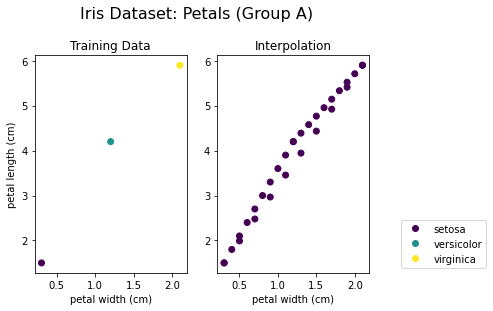

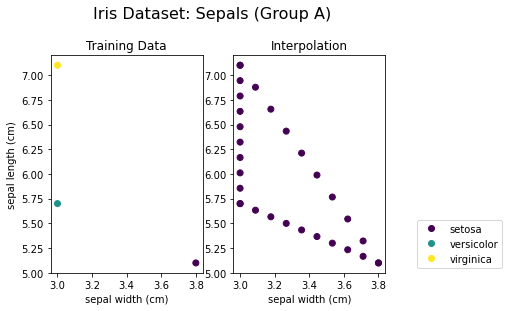

In [79]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group A)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_A['petal width (cm)'], 
            df_iris_new_A['petal length (cm)'],
            c = df_iris_new_A['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_A_final['petal width (cm)'], 
            df_iris_A_final['petal length (cm)'],
            c = df_iris_A_final['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group A)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_A['sepal width (cm)'], 
            df_iris_new_A['sepal length (cm)'],
            c = df_iris_new_A['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_A_final['sepal width (cm)'], 
            df_iris_A_final['sepal length (cm)'],
            c = df_iris_A_final['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()



In [80]:
df_iris_new_B

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
69,5.6,2.5,3.9,1.1,1
138,6.0,3.0,4.8,1.8,2


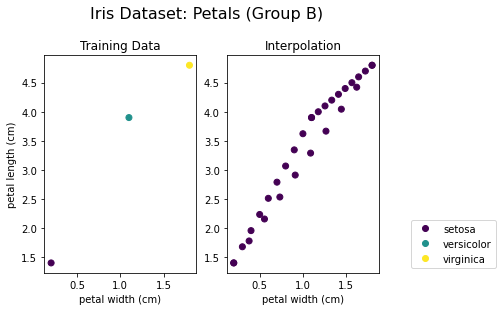

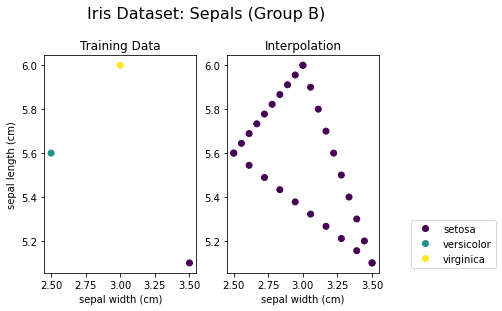

In [81]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group B)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_B['petal width (cm)'], 
            df_iris_new_B['petal length (cm)'],
            c = df_iris_new_B['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_B_final['petal width (cm)'], 
            df_iris_B_final['petal length (cm)'],
            c = df_iris_B_final['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group B)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_B['sepal width (cm)'], 
            df_iris_new_B['sepal length (cm)'],
            c = df_iris_new_B['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_B_final['sepal width (cm)'], 
            df_iris_B_final['sepal length (cm)'],
            c = df_iris_B_final['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

In [82]:
df_iris_new_C

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
10,5.4,3.7,1.5,0.2,0
80,5.5,2.4,3.8,1.1,1
140,6.7,3.1,5.6,2.4,2


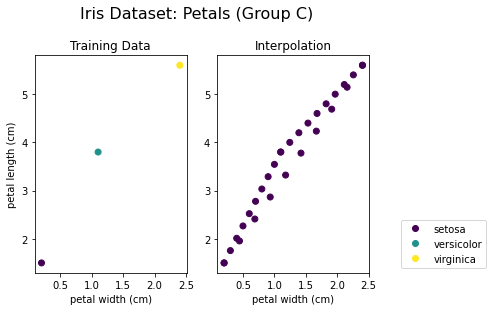

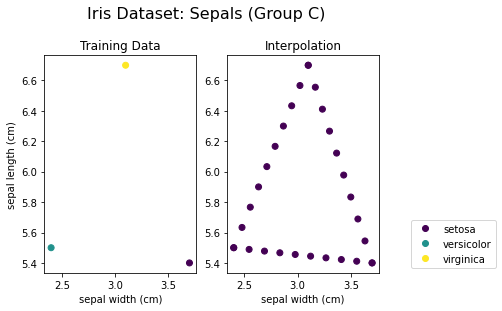

In [83]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group C)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_C['petal width (cm)'], 
            df_iris_new_C['petal length (cm)'],
            c = df_iris_new_C['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_C_final['petal width (cm)'], 
            df_iris_C_final['petal length (cm)'],
            c = df_iris_C_final['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group C)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_C['sepal width (cm)'], 
            df_iris_new_C['sepal length (cm)'],
            c = df_iris_new_C['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_C_final['sepal width (cm)'], 
            df_iris_C_final['sepal length (cm)'],
            c = df_iris_C_final['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

In [84]:
df_iris_new_D

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
21,5.1,3.7,1.5,0.4,0
90,5.5,2.6,4.4,1.2,1
149,5.9,3.0,5.1,1.8,2


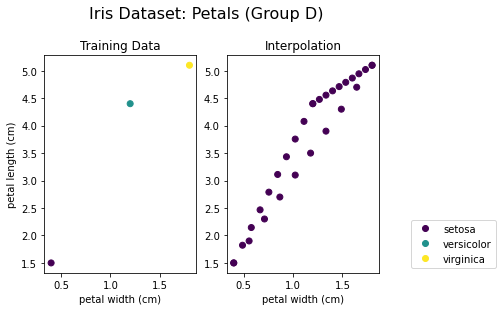

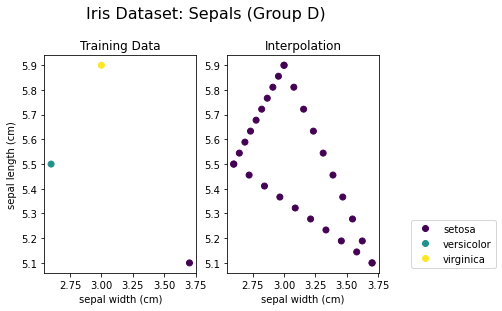

In [85]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group D)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_D['petal width (cm)'], 
            df_iris_new_D['petal length (cm)'],
            c = df_iris_new_D['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_D_final['petal width (cm)'], 
            df_iris_D_final['petal length (cm)'],
            c = df_iris_D_final['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group D)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_D['sepal width (cm)'], 
            df_iris_new_D['sepal length (cm)'],
            c = df_iris_new_D['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_D_final['sepal width (cm)'], 
            df_iris_D_final['sepal length (cm)'],
            c = df_iris_D_final['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

In [86]:
df_iris_new_E

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
47,4.6,3.2,1.4,0.2,0
99,5.7,2.8,4.1,1.3,1
111,6.4,2.7,5.3,1.9,2


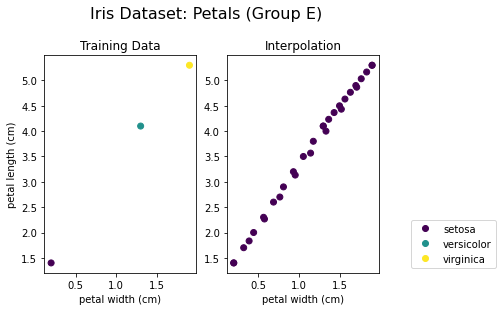

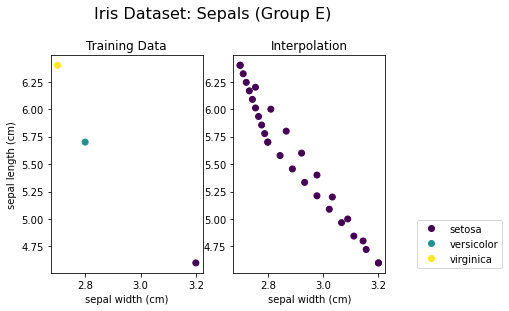

In [87]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group E)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_E['petal width (cm)'], 
            df_iris_new_E['petal length (cm)'],
            c = df_iris_new_E['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_E_final['petal width (cm)'], 
            df_iris_E_final['petal length (cm)'],
            c = df_iris_E_final['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group E)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_E['sepal width (cm)'], 
            df_iris_new_E['sepal length (cm)'],
            c = df_iris_new_E['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_E_final['sepal width (cm)'], 
            df_iris_E_final['sepal length (cm)'],
            c = df_iris_E_final['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

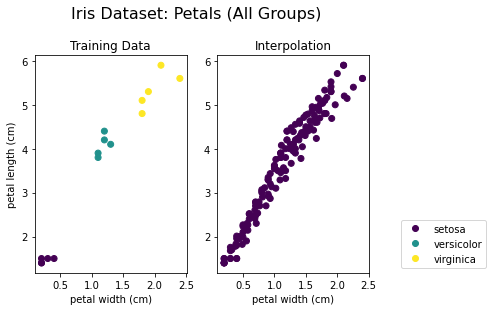

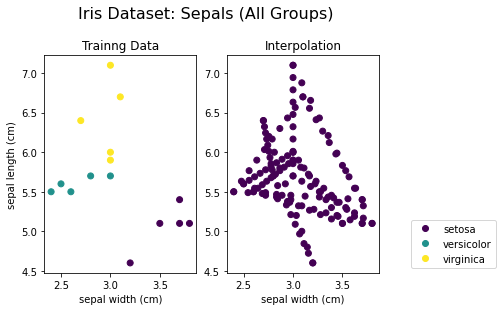

In [88]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (All Groups)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_ABCDE['petal width (cm)'], 
            df_iris_new_ABCDE['petal length (cm)'],
            c = df_iris_new_ABCDE['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_ABCDE_final['petal width (cm)'], 
            df_iris_ABCDE_final['petal length (cm)'],
            c = df_iris_ABCDE_final['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Trainng Data')

plt.suptitle('Iris Dataset: Sepals (All Groups)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_ABCDE['sepal width (cm)'], 
            df_iris_new_ABCDE['sepal length (cm)'],
            c = df_iris_new_ABCDE['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_ABCDE_final['sepal width (cm)'], 
            df_iris_ABCDE_final['sepal length (cm)'],
            c = df_iris_ABCDE_final['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.show()

# Predictions Using Tensorflow
### Tutorial: https://medium.com/@nutanbhogendrasharma/tensorflow-deep-learning-model-with-iris-dataset-8ec344c49f91

### Also See: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

### https://wandb.ai/ayush-thakur/dl-question-bank/reports/Keras-Layer-Input-Explanation-With-Code-Samples--VmlldzoyMDIzMDU

### https://rpubs.com/Nilafhiosagam/541333

### https://www.kaggle.com/code/niteshhalai/iris-species-keras-basics

### Creating Confusion Matrix using scalar_object: https://www.kaggle.com/code/niteshhalai/iris-species-keras-basics

In [89]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

## Predictions Using Iris Dataset (Unmodified)

In [90]:
iris = load_iris()

In [91]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [92]:
X = iris.data

In [93]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [94]:
y = iris.target

In [95]:
# Use One-Hot-Encoding
Y = pd.get_dummies(y).values

In [96]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [97]:
# train_test_split data using sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [98]:
from sklearn import metrics
import seaborn as sns
sns.set_theme(style='white')

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler_object = MinMaxScaler()
scaler_object.fit(X_train)

scaled_X_train = scaler_object.transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

### Model 1

Model 1,  Step  0


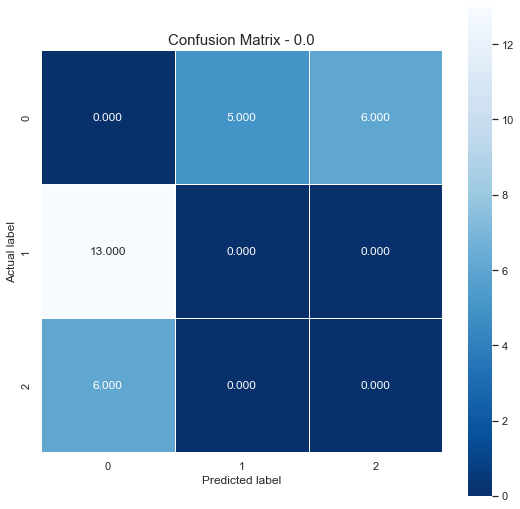

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      11.0
           1       0.00      0.00      0.00      13.0
           2       0.00      0.00      0.00       6.0

    accuracy                           0.00      30.0
   macro avg       0.00      0.00      0.00      30.0
weighted avg       0.00      0.00      0.00      30.0

------------------------------
Model 1,  Step  1


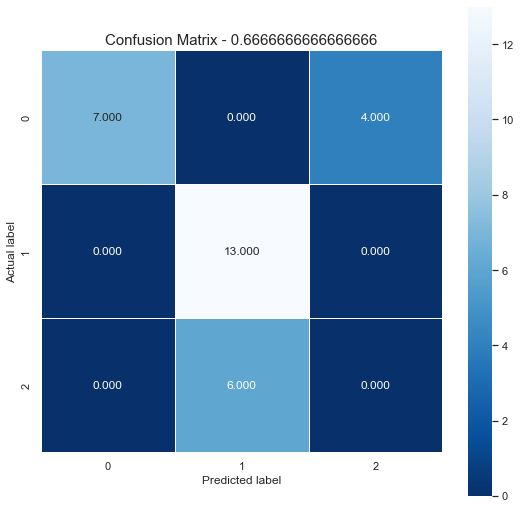

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.68      1.00      0.81        13
           2       0.00      0.00      0.00         6

    accuracy                           0.67        30
   macro avg       0.56      0.55      0.53        30
weighted avg       0.66      0.67      0.64        30

------------------------------
Model 1,  Step  2


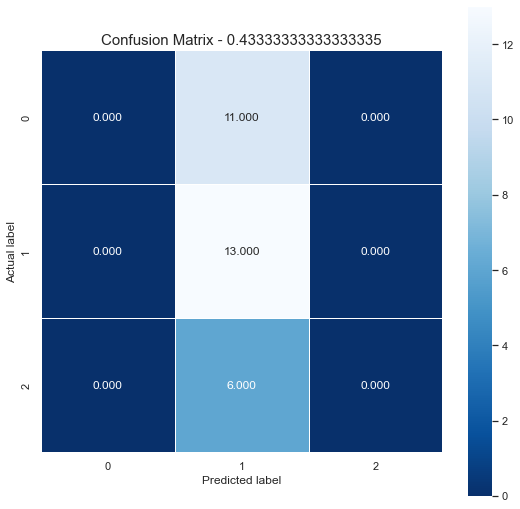

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.43      1.00      0.60        13
           2       0.00      0.00      0.00         6

    accuracy                           0.43        30
   macro avg       0.14      0.33      0.20        30
weighted avg       0.19      0.43      0.26        30

------------------------------
Model 1,  Step  3


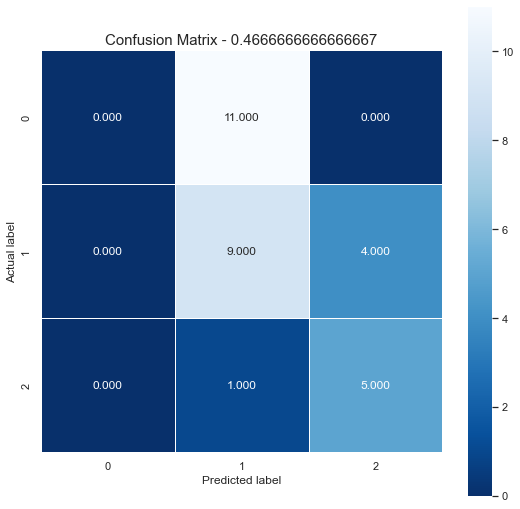

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.43      0.69      0.53        13
           2       0.56      0.83      0.67         6

    accuracy                           0.47        30
   macro avg       0.33      0.51      0.40        30
weighted avg       0.30      0.47      0.36        30

------------------------------
Model 1,  Step  4


D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


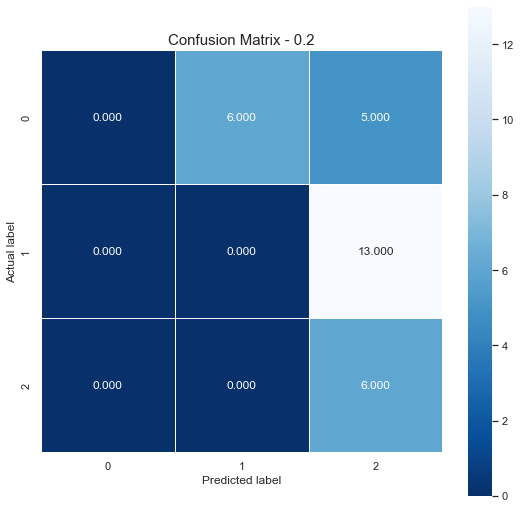

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        13
           2       0.25      1.00      0.40         6

    accuracy                           0.20        30
   macro avg       0.08      0.33      0.13        30
weighted avg       0.05      0.20      0.08        30

------------------------------
Model 1,  Step  5


D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


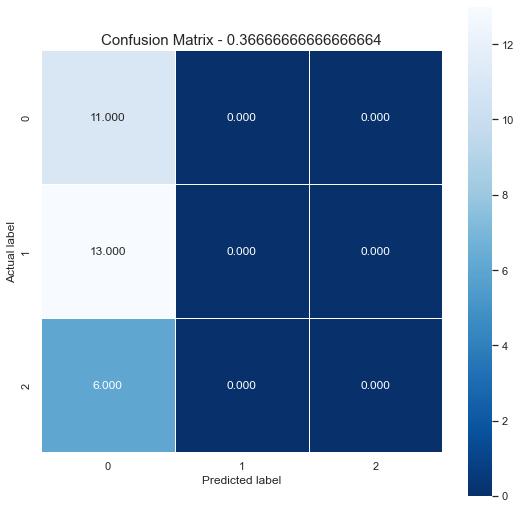

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.37      1.00      0.54        11
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         6

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30

------------------------------
Model 1,  Step  6


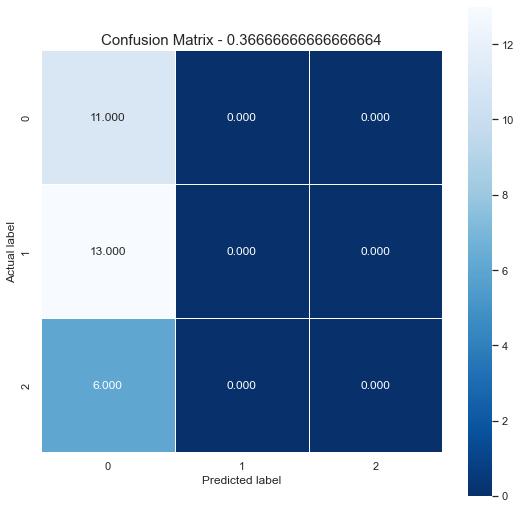

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.37      1.00      0.54        11
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         6

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30

------------------------------
Model 1,  Step  7


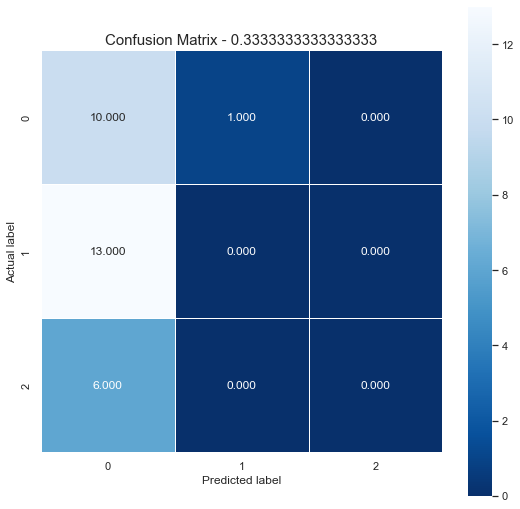

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.34      0.91      0.50        11
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         6

    accuracy                           0.33        30
   macro avg       0.11      0.30      0.17        30
weighted avg       0.13      0.33      0.18        30

------------------------------
Model 1,  Step  8


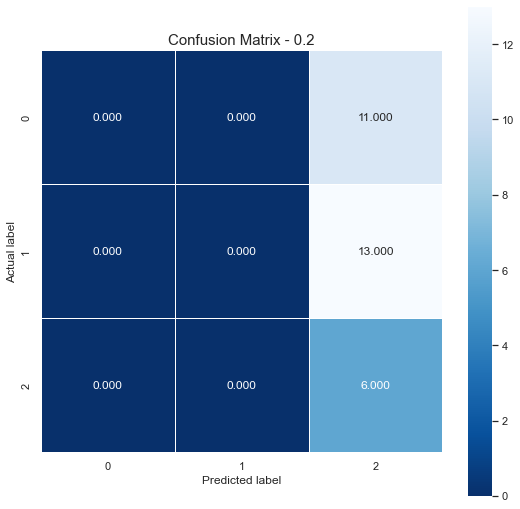

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        13
           2       0.20      1.00      0.33         6

    accuracy                           0.20        30
   macro avg       0.07      0.33      0.11        30
weighted avg       0.04      0.20      0.07        30

------------------------------
Model 1,  Step  9


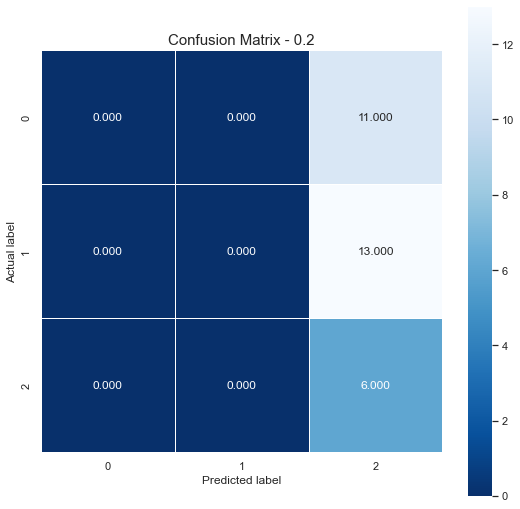

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        13
           2       0.20      1.00      0.33         6

    accuracy                           0.20        30
   macro avg       0.07      0.33      0.11        30
weighted avg       0.04      0.20      0.07        30

------------------------------


D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
acc_array_1 = []
for step, i in zip(tf.range(10), range(10)):
    print('Model 1,  Step ', i)
    
    model_1 = tf.keras.Sequential([ 
        tf.keras.layers.Dense(4),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3)])
    
    model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    model_1.fit(scaled_X_train, y_train, batch_size=50, epochs=100, verbose=0)
    
    predict_x = model_1.predict(scaled_X_test)
    y_pred = np.argmax(predict_x,axis=1)
    
    cm = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - '+str(metrics.accuracy_score(y_test.argmax(axis=1),y_pred))
    plt.title(all_sample_title, size = 15);
    plt.show()
    print(metrics.classification_report(y_test.argmax(axis=1),y_pred))
    print('------------------------------')
    acc_array_1.append(metrics.accuracy_score(y_test.argmax(axis=1),y_pred))   
    
#     loss, accuracy = model_1.evaluate(X_test, y_test, verbose=0)
#     print('Test loss:', loss)
#     print('Test accuracy:', accuracy)
#     print('\n')
    
    

In [101]:
print('Model 1 Accuracy Array: \n', acc_array_1)

Model 1 Accuracy Array: 
 [0.0, 0.6666666666666666, 0.43333333333333335, 0.4666666666666667, 0.2, 0.36666666666666664, 0.36666666666666664, 0.3333333333333333, 0.2, 0.2]


### Model 2

Model 2,  Step  1


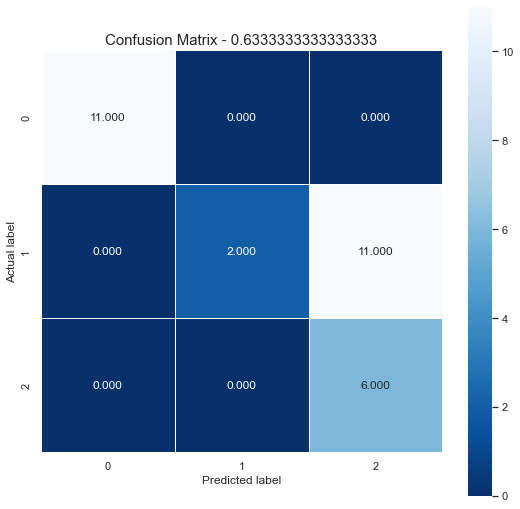

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.15      0.27        13
           2       0.35      1.00      0.52         6

    accuracy                           0.63        30
   macro avg       0.78      0.72      0.60        30
weighted avg       0.87      0.63      0.59        30

------------------------------
Model 2,  Step  2


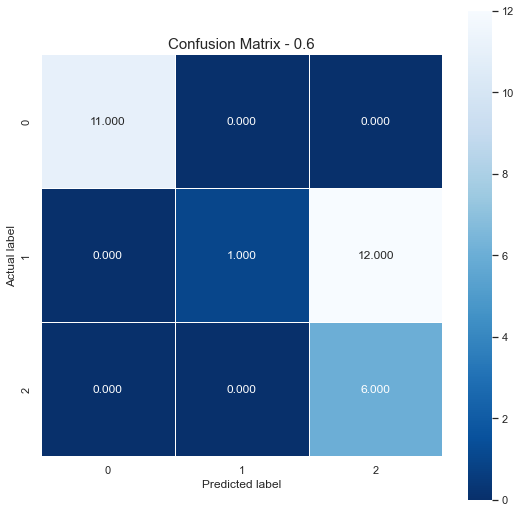

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.08      0.14        13
           2       0.33      1.00      0.50         6

    accuracy                           0.60        30
   macro avg       0.78      0.69      0.55        30
weighted avg       0.87      0.60      0.53        30

------------------------------
Model 2,  Step  3


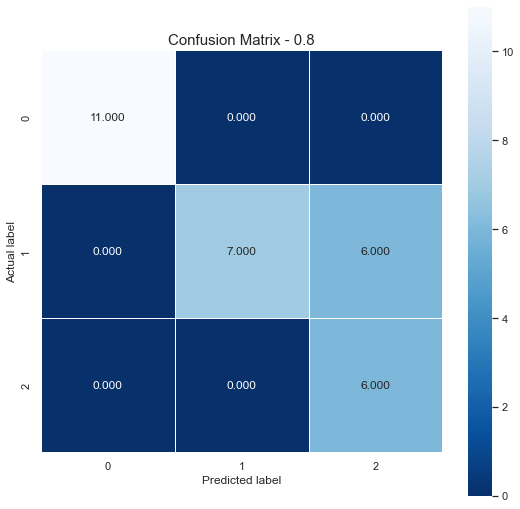

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.54      0.70        13
           2       0.50      1.00      0.67         6

    accuracy                           0.80        30
   macro avg       0.83      0.85      0.79        30
weighted avg       0.90      0.80      0.80        30

------------------------------
Model 2,  Step  4


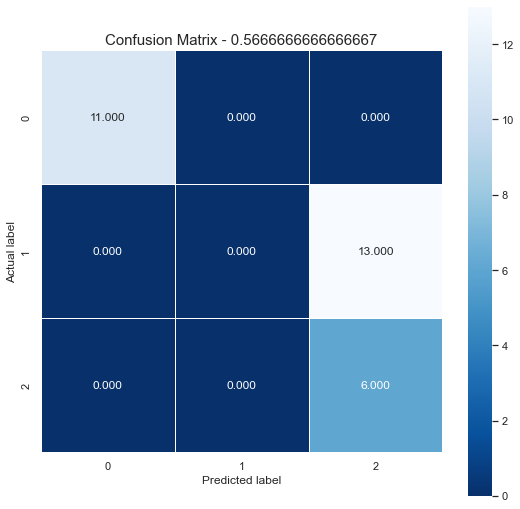

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

------------------------------
Model 2,  Step  5


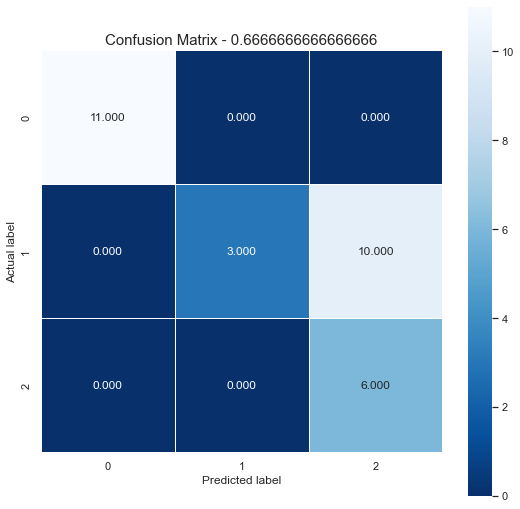

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.23      0.38        13
           2       0.38      1.00      0.55         6

    accuracy                           0.67        30
   macro avg       0.79      0.74      0.64        30
weighted avg       0.88      0.67      0.64        30

------------------------------
Model 2,  Step  6


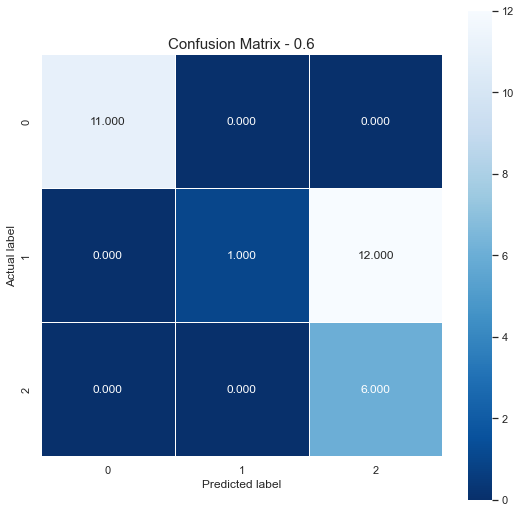

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.08      0.14        13
           2       0.33      1.00      0.50         6

    accuracy                           0.60        30
   macro avg       0.78      0.69      0.55        30
weighted avg       0.87      0.60      0.53        30

------------------------------
Model 2,  Step  7


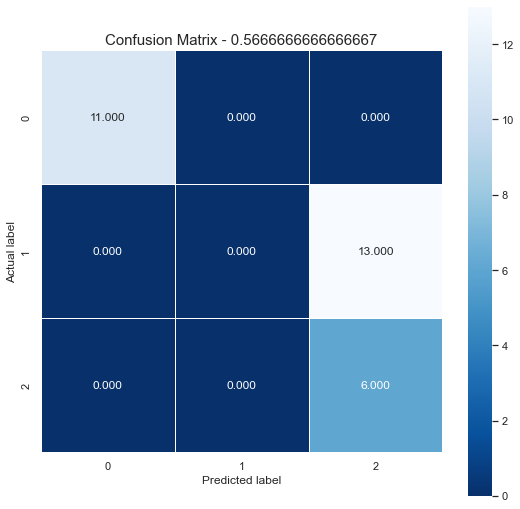

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

------------------------------
Model 2,  Step  8


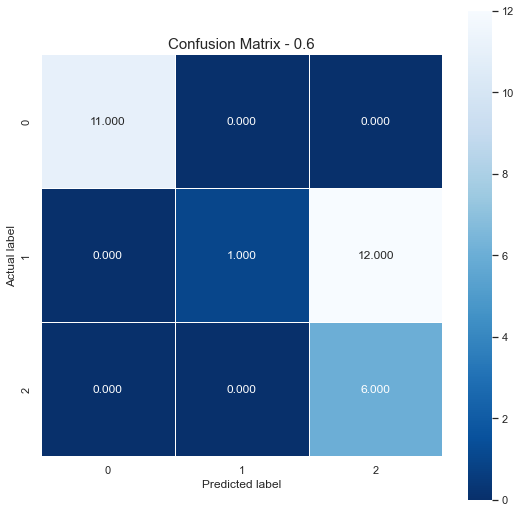

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.08      0.14        13
           2       0.33      1.00      0.50         6

    accuracy                           0.60        30
   macro avg       0.78      0.69      0.55        30
weighted avg       0.87      0.60      0.53        30

------------------------------
Model 2,  Step  9


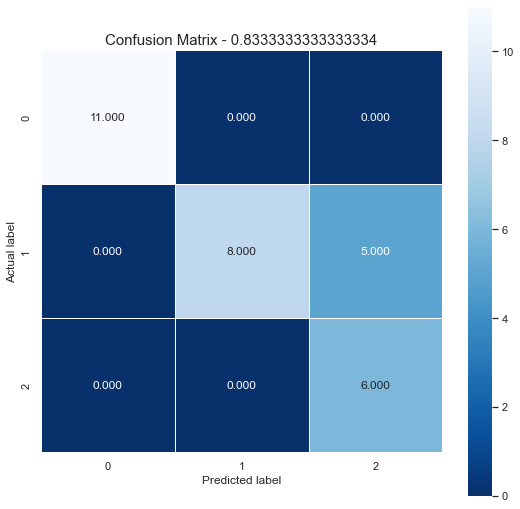

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.62      0.76        13
           2       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.85      0.87      0.82        30
weighted avg       0.91      0.83      0.84        30

------------------------------
Model 2,  Step  10


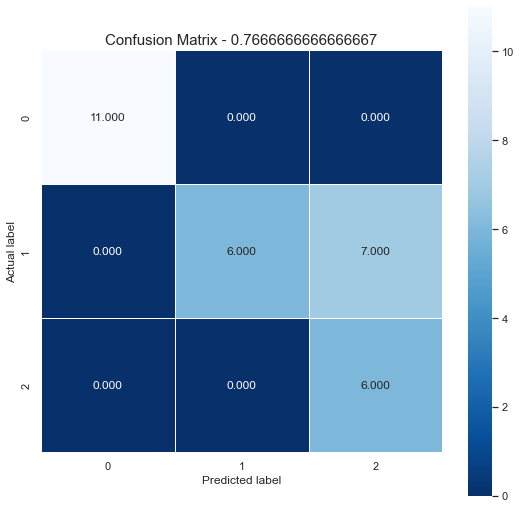

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30

------------------------------


In [102]:
acc_array_2 = []
for step, i in zip(tf.range(10), range(10)):
    print('Model 2,  Step ', i + 1)
    
    model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
      ])
    
    model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    model_2.fit(scaled_X_train, y_train, batch_size=50, epochs=100, verbose=0)
    
    predict_x = model_2.predict(scaled_X_test)
    y_pred = np.argmax(predict_x,axis=1)
    
    cm = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - '+str(metrics.accuracy_score(y_test.argmax(axis=1),y_pred))
    plt.title(all_sample_title, size = 15);
    plt.show()
    print(metrics.classification_report(y_test.argmax(axis=1),y_pred))
    print('------------------------------')
    acc_array_2.append(metrics.accuracy_score(y_test.argmax(axis=1),y_pred))    
    

In [103]:
print('Model 2 Accuracy Array: \n', acc_array_2)

Model 2 Accuracy Array: 
 [0.6333333333333333, 0.6, 0.8, 0.5666666666666667, 0.6666666666666666, 0.6, 0.5666666666666667, 0.6, 0.8333333333333334, 0.7666666666666667]


### Model 3

Model 3,  Step  0


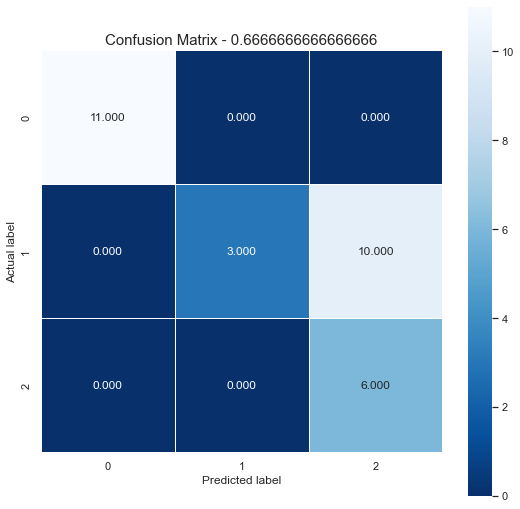

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.23      0.38        13
           2       0.38      1.00      0.55         6

    accuracy                           0.67        30
   macro avg       0.79      0.74      0.64        30
weighted avg       0.88      0.67      0.64        30

------------------------------
Model 3,  Step  1


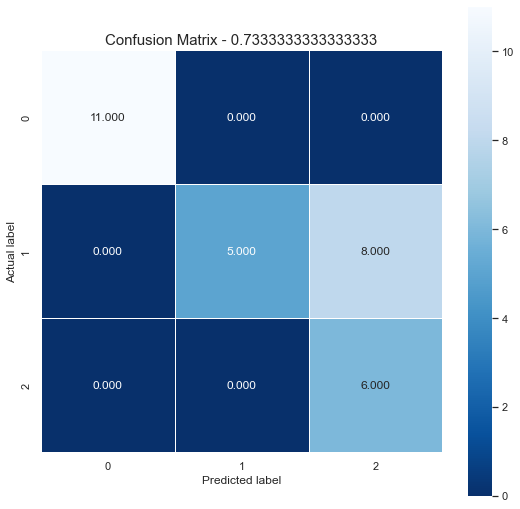

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.38      0.56        13
           2       0.43      1.00      0.60         6

    accuracy                           0.73        30
   macro avg       0.81      0.79      0.72        30
weighted avg       0.89      0.73      0.73        30

------------------------------
Model 3,  Step  2


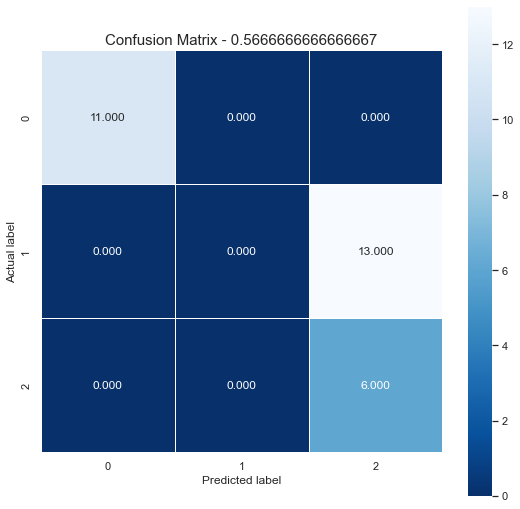

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

------------------------------
Model 3,  Step  3


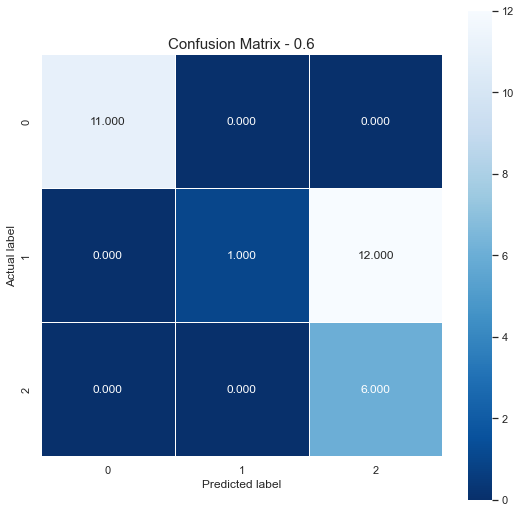

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.08      0.14        13
           2       0.33      1.00      0.50         6

    accuracy                           0.60        30
   macro avg       0.78      0.69      0.55        30
weighted avg       0.87      0.60      0.53        30

------------------------------
Model 3,  Step  4


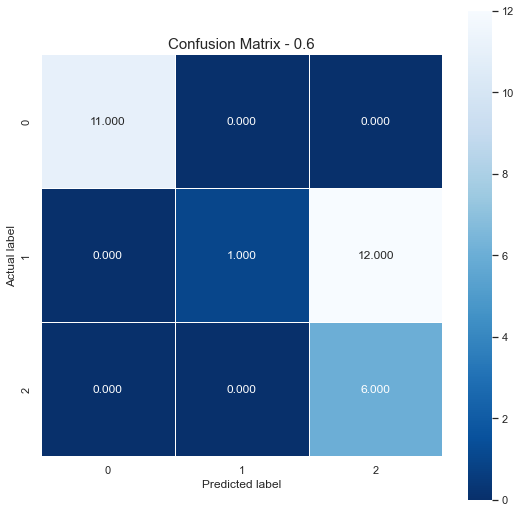

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.08      0.14        13
           2       0.33      1.00      0.50         6

    accuracy                           0.60        30
   macro avg       0.78      0.69      0.55        30
weighted avg       0.87      0.60      0.53        30

------------------------------
Model 3,  Step  5


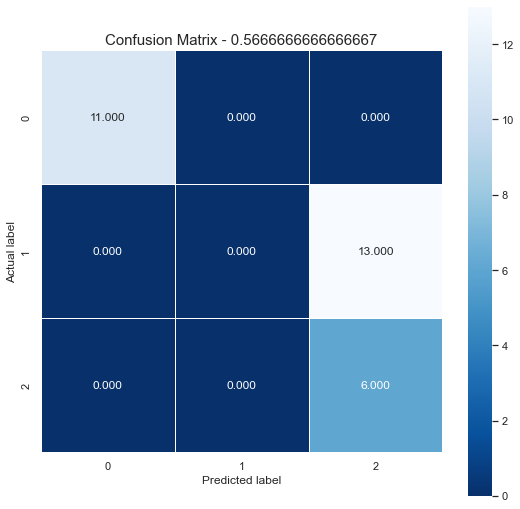

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

------------------------------
Model 3,  Step  6


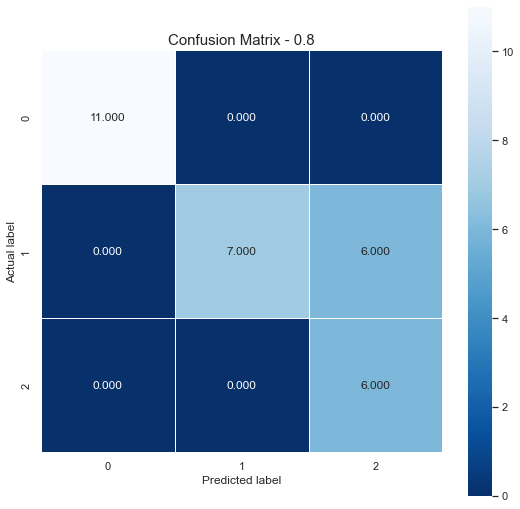

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.54      0.70        13
           2       0.50      1.00      0.67         6

    accuracy                           0.80        30
   macro avg       0.83      0.85      0.79        30
weighted avg       0.90      0.80      0.80        30

------------------------------
Model 3,  Step  7


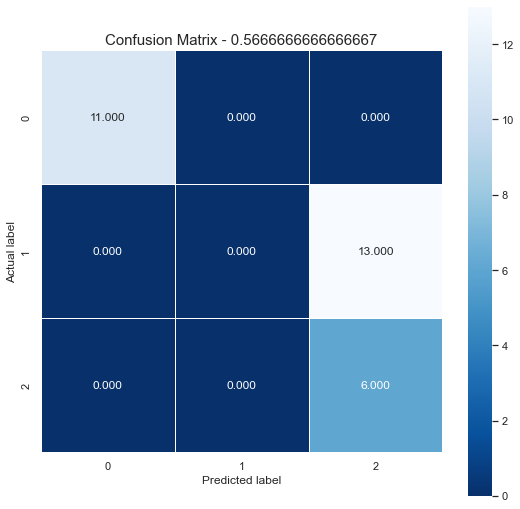

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

------------------------------
Model 3,  Step  8


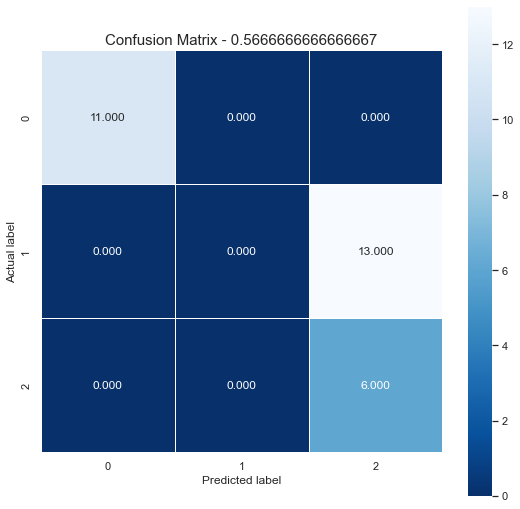

D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

------------------------------
Model 3,  Step  9


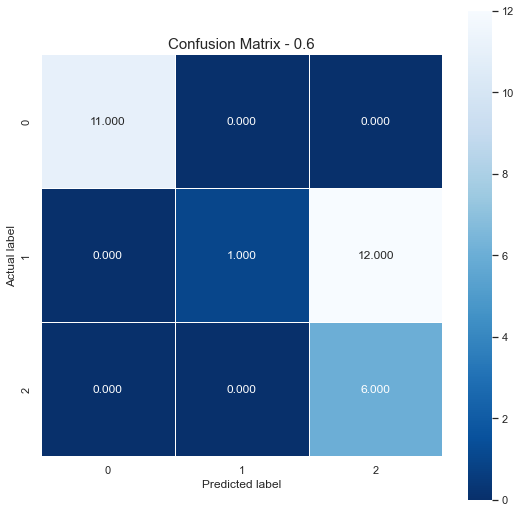

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.08      0.14        13
           2       0.33      1.00      0.50         6

    accuracy                           0.60        30
   macro avg       0.78      0.69      0.55        30
weighted avg       0.87      0.60      0.53        30

------------------------------


In [104]:
acc_array_3 = []
for step, i in zip(tf.range(10), range(10)):
    print('Model 3,  Step ', i)
    
    model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
      ])
    
    model_3.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    model_3.fit(scaled_X_train, y_train, batch_size=50, epochs=100, verbose=0)
    
    predict_x = model_3.predict(scaled_X_test)
    y_pred = np.argmax(predict_x,axis=1)
    
    cm = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - '+str(metrics.accuracy_score(y_test.argmax(axis=1),y_pred))
    plt.title(all_sample_title, size = 15);
    plt.show()
    print(metrics.classification_report(y_test.argmax(axis=1),y_pred))
    print('------------------------------')
    acc_array_3.append(metrics.accuracy_score(y_test.argmax(axis=1),y_pred))
    
    

In [105]:
print('Model 3 Accuracy Array: \n', acc_array_3)

Model 3 Accuracy Array: 
 [0.6666666666666666, 0.7333333333333333, 0.5666666666666667, 0.6, 0.6, 0.5666666666666667, 0.8, 0.5666666666666667, 0.5666666666666667, 0.6]


In [106]:
df_iris_new_ABCDE

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
45,4.8,3.0,1.4,0.3,0
79,5.7,2.6,3.5,1.0,1
144,6.7,3.3,5.7,2.5,2
48,5.3,3.7,1.5,0.2,0
69,5.6,2.5,3.9,1.1,1
141,6.9,3.1,5.1,2.3,2
28,5.2,3.4,1.4,0.2,0
67,5.8,2.7,4.1,1.0,1
123,6.3,2.7,4.9,1.8,2
20,5.4,3.4,1.7,0.2,0


In [107]:
df_iris_ABCDE_final

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predictions
0,4.800000,3.000000,1.400000,0.300000,0
1,4.900000,2.955556,1.633333,0.377778,0
2,5.000000,2.911111,1.866667,0.455556,0
3,5.100000,2.866667,2.100000,0.533333,0
4,5.200000,2.822222,2.333333,0.611111,0
...,...,...,...,...,...
5,6.177778,3.000000,5.055556,1.833333,2
6,6.333333,3.000000,5.166667,1.900000,2
7,6.488889,3.000000,5.277778,1.966667,2
8,6.644444,3.000000,5.388889,2.033333,2


## Predictions using Interpolated Iris Dataset

In [108]:
df_iris_inter = df_iris_ABCDE_final.drop("Predictions", axis=1)

In [109]:
df_iris_inter

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.800000,3.000000,1.400000,0.300000
1,4.900000,2.955556,1.633333,0.377778
2,5.000000,2.911111,1.866667,0.455556
3,5.100000,2.866667,2.100000,0.533333
4,5.200000,2.822222,2.333333,0.611111
...,...,...,...,...
5,6.177778,3.000000,5.055556,1.833333
6,6.333333,3.000000,5.166667,1.900000
7,6.488889,3.000000,5.277778,1.966667
8,6.644444,3.000000,5.388889,2.033333


In [110]:
X = df_iris_inter.values

In [111]:
X

array([[4.8       , 3.        , 1.4       , 0.3       ],
       [4.9       , 2.95555556, 1.63333333, 0.37777778],
       [5.        , 2.91111111, 1.86666667, 0.45555556],
       [5.1       , 2.86666667, 2.1       , 0.53333333],
       [5.2       , 2.82222222, 2.33333333, 0.61111111],
       [5.3       , 2.77777778, 2.56666667, 0.68888889],
       [5.4       , 2.73333333, 2.8       , 0.76666667],
       [5.5       , 2.68888889, 3.03333333, 0.84444444],
       [5.6       , 2.64444444, 3.26666667, 0.92222222],
       [5.7       , 2.6       , 3.5       , 1.        ],
       [4.8       , 3.        , 1.4       , 0.3       ],
       [5.01111111, 3.03333333, 1.87777778, 0.54444444],
       [5.22222222, 3.06666667, 2.35555556, 0.78888889],
       [5.43333333, 3.1       , 2.83333333, 1.03333333],
       [5.64444444, 3.13333333, 3.31111111, 1.27777778],
       [5.85555556, 3.16666667, 3.78888889, 1.52222222],
       [6.06666667, 3.2       , 4.26666667, 1.76666667],
       [6.27777778, 3.23333333,

In [112]:
y = df_iris_ABCDE_final['Predictions'].values

In [113]:
y

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [114]:
Y = pd.get_dummies(y).values

In [93]:
dummies = pd.get_dummies(df, prefix='', prefix_sep='')
dummies = dummies.T.reindex(y).T.fillna(0)

In [94]:
dummies

,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
X_train_I, X_test_I, y_train_I, y_test_I = train_test_split(X, Y, test_size=0.2, random_state=0)

In [116]:
scaler_object = MinMaxScaler()
scaler_object.fit(X_train_I)

scaled_X_train = scaler_object.transform(X_train_I)
scaled_X_test = scaler_object.transform(X_test)

### Model 4

In [118]:
acc_array_4 = []
for step, i in zip(tf.range(10), range(10)):
    print('Model 4,  Step ', i)
    
    model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
      ])
    
    model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    model_4.fit(scaled_X_train, y_train_I, batch_size=50, epochs=100, verbose=0)
    
    predict_x = model_4.predict(scaled_X_test)
    y_pred = np.argmax(predict_x,axis=1)
    
    cm = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - '+str(metrics.accuracy_score(y_test.argmax(axis=1),y_pred))
    plt.title(all_sample_title, size = 15);
    plt.show()
    print(metrics.classification_report(y_test.argmax(axis=1),y_pred))
    
    acc_array_4.append(metrics.accuracy_score(y_test.argmax(axis=1),y_pred))
    print('------------------------------')
    
    

Model 4,  Step  0


ValueError: in user code:

    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "D:\anaconda3\envs\tf_gpu\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 2) and (None, 3) are incompatible


In [119]:
scaled_X_train

array([[0.76190476, 0.52777778, 0.74160207, 0.64251208],
       [0.58201058, 0.16666667, 0.71059432, 0.50241546],
       [0.7989418 , 0.53703704, 0.88630491, 0.85507246],
       [0.24338624, 0.52777778, 0.56072351, 0.43961353],
       [0.28571429, 0.80555556, 0.2118863 , 0.18357488],
       [1.        , 0.5       , 0.86046512, 0.91304348],
       [0.8042328 , 0.63888889, 0.88888889, 0.89371981],
       [0.55555556, 0.16666667, 0.68992248, 0.46376812],
       [0.22222222, 0.68518519, 0.06976744, 0.03864734],
       [0.31746032, 0.67592593, 0.19896641, 0.09661836],
       [0.51322751, 0.41666667, 0.71834625, 0.49275362],
       [0.0952381 , 0.34259259, 0.10852713, 0.11111111],
       [0.35978836, 0.41666667, 0.74677003, 0.5942029 ],
       [0.49206349, 0.83333333, 0.30232558, 0.30434783],
       [0.        , 0.41666667, 0.        , 0.04347826],
       [0.19047619, 0.75      , 0.        , 0.        ],
       [0.68253968, 0.41666667, 0.85271318, 0.60869565],
       [0.58201058, 0.41666667,

In [120]:
y_train_I

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1,

In [ ]:
print('Model 4 Accuracy Array: \n', acc_array_4)

In [ ]:
print('Models Accuracy Ratings: \n', 
      'Model 1: \n', acc_array_1, '\n\n', 
      'Model 2: \n', acc_array_2, '\n\n', 
      'Model 3: \n', acc_array_3, '\n\n', 
      'Model 4: \n', acc_array_4, '\n\n')